In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10
model_params_dir = "/Users/yhhan/temp3"

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

Multi Layer Network Model - ID: R6KYMLJD


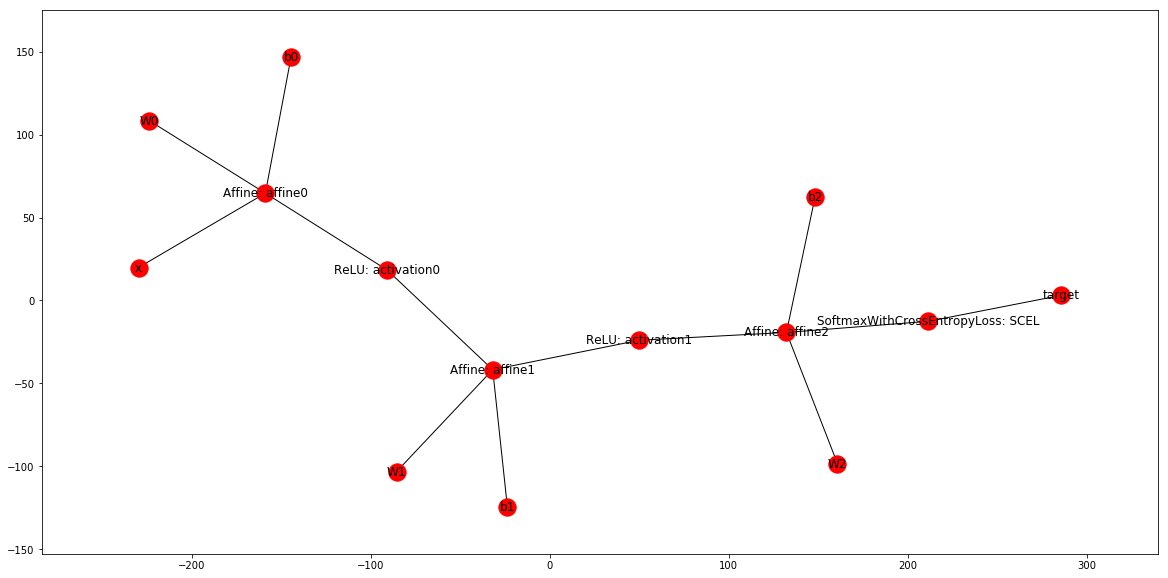

In [3]:
n.draw_and_show(figsize=(20, 10))

In [4]:
data = mnist.MNIST_Data()
#data = mnist.Fashion_MNIST_Data()

In [5]:
forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
%timeit -n1 -r1 n.learning(max_epoch=50, data=data, batch_size=batch_size, print_period=1, is_numba=True, verbose=False)

forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.0603
-- Learning Started --
Epoch   0 Completed - Train Error: 2.302294 - Validation Error: 2.303904 - Test Accuracy: 0.060300
Epoch   1 Completed - Train Error: 0.371642 - Validation Error: 0.382788 - Test Accuracy: 0.887700
Epoch   2 Completed - Train Error: 0.285802 - Validation Error: 0.265165 - Test Accuracy: 0.920100
Epoch   3 Completed - Train Error: 0.255892 - Validation Error: 0.215508 - Test Accuracy: 0.934700
Epoch   4 Completed - Train Error: 0.185524 - Validation Error: 0.184596 - Test Accuracy: 0.943400
Epoch   5 Completed - Train Error: 0.159256 - Validation Error: 0.164064 - Test Accuracy: 0.949300
Epoch   6 Completed - Train Error: 0.134057 - Validation Error: 0.148827 - Test Accuracy: 0.952900
Epoch   7 Completed - Train Error: 0.128691 - Validation Error: 0.136984 - Test Accuracy: 0.957000
Epoch   8 Completed - Train Error: 0.103329 - Validation Error: 0.127355 - Test Accuracy: 0.961200
Epoch   9 Completed - Train Error: 0.106973 - Validation Error

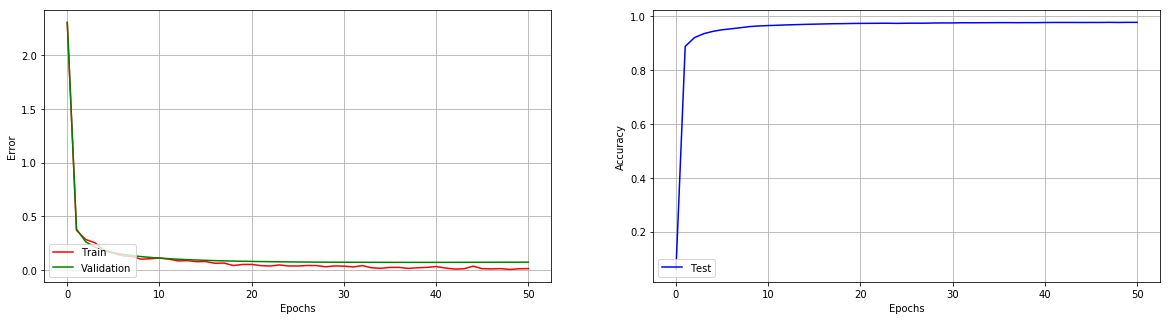

In [6]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 149, Prediction: Four, Ground Truth: Two
False Prediction Index: 247, Prediction: Two, Ground Truth: Four
False Prediction Index: 259, Prediction: Zero, Ground Truth: Six
False Prediction Index: 321, Prediction: Seven, Ground Truth: Two
False Prediction Index: 340, Prediction: Three, Ground Truth: Five


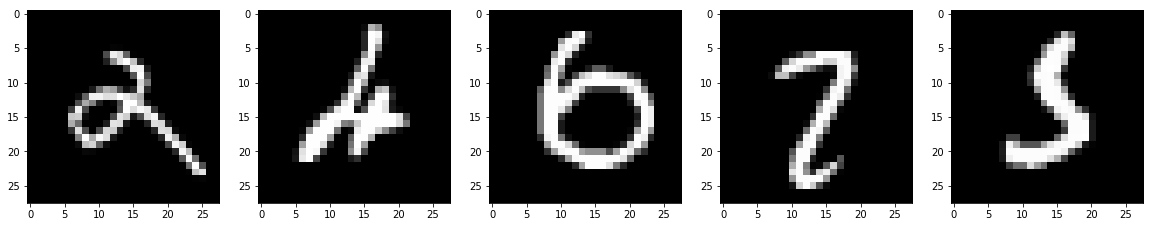

In [7]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

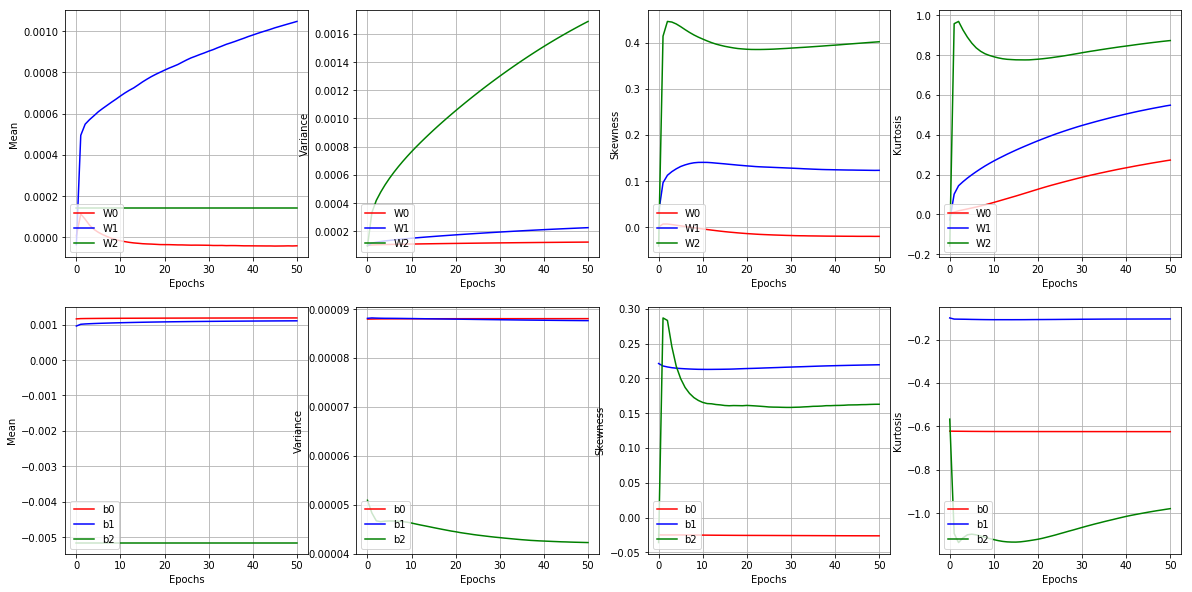

In [8]:
n.draw_param_description(figsize=(20, 10))